# Feasibility of getting Investors based on Loan Characteristics

## by Carol Ogira

## Investigation Overview

In this analysis, the main focus is to outline the variables that could best determine likelihood of getting investors to fund a loan, in regards to both the borrower profile and loan characteristics.

## Dataset Overview

Our dataset, explored and appropriately wrangled, has 75494 rows and 23 features. Some these features are prosper score, employment status of the borrower, their income range, amount of loan borrowed, maonthly payment, number of investors, among others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# loading in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperloandata_cleaned.csv')
# loan_data.info()

In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74127 entries, 0 to 74126
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ListingNumber                74127 non-null  int64  
 1   ListingCreationYear          74127 non-null  int64  
 2   ListingCreationMonth         74127 non-null  object 
 3   ListingCreationDay           74127 non-null  int64  
 4   Term                         74127 non-null  int64  
 5   LoanStatus                   74127 non-null  object 
 6   ProsperRating                68459 non-null  object 
 7   ProsperScore                 74127 non-null  float64
 8   BorrowerState                74127 non-null  object 
 9   Occupation                   74127 non-null  object 
 10  EmploymentStatus             74126 non-null  object 
 11  DebtToIncomeRatio            74127 non-null  float64
 12  IncomeRange                  74127 non-null  object 
 13  IncomeVerifiable

## Trend of Loan Amount Borrowed across time periods.

For the years in the dataset, the amount of loan borrowed steadily increased, which can possibly be attributed to by inflation, and the increasing need for money for various purposes over the years. A closer look at the trend across days of the month, the amount of loans borrowed had periodic upward and downward trends, with a peak at the end of the month. 

Could this be a tactic to get more investors due to availablity of funds at the end of the month?


In [4]:
# categorizing months
cat_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_cat = pd.api.types.CategoricalDtype(ordered = True, categories = cat_months)
loan_data['ListingCreationMonth'] = loan_data['ListingCreationMonth'].astype(month_cat);

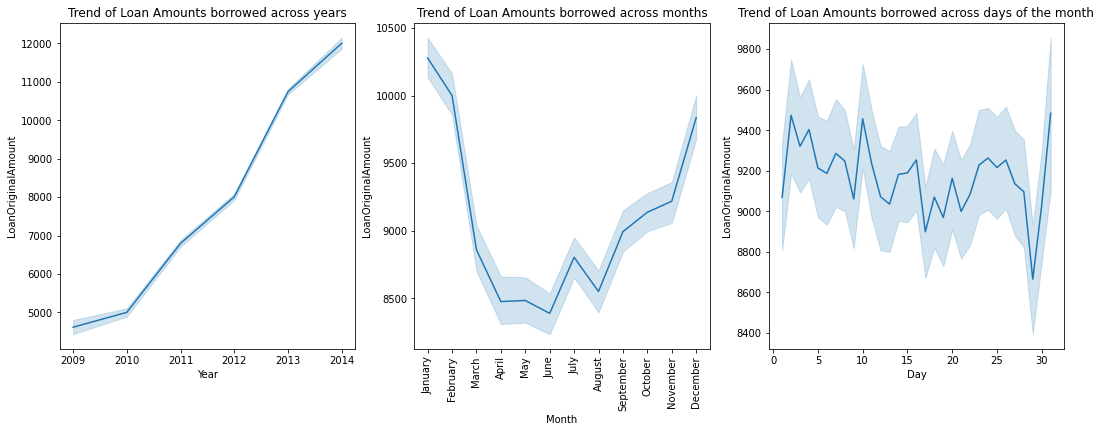

In [5]:
plt.figure(figsize = (18, 6))

# trend of loan amounts by years
# plt.figure(figsize = (8,6))
plt.subplot(131)
sns.lineplot(data = loan_data, x = 'ListingCreationYear', y = 'LoanOriginalAmount');
plt.title('Trend of Loan Amounts borrowed across years');
plt.xlabel('Year');

# trend by month
plt.subplot(132)
sns.lineplot(data = loan_data, x = 'ListingCreationMonth', y = 'LoanOriginalAmount')
plt.title('Trend of Loan Amounts borrowed across months');
plt.xticks(rotation = 90)
plt.xlabel('Month');

# trend by day
plt.subplot(133)
sns.lineplot(data = loan_data, x = 'ListingCreationDay', y = 'LoanOriginalAmount')
plt.title('Trend of Loan Amounts borrowed across days of the month');
plt.xlabel('Day');

## Change in the number of investors per listing over time

Over the years being analysed, more loans were being borrowed though prosper. However, the number of investors funding each loan was tremendously decreasing.


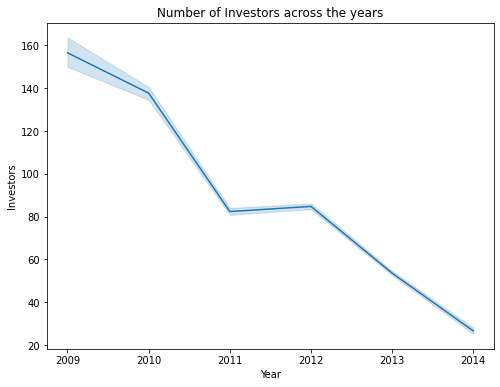

In [6]:
plt.figure(figsize = (8,6))
sns.lineplot(data = loan_data, x = 'ListingCreationYear', y = 'Investors');
plt.title('Number of Investors across the years');
plt.xlabel('Year');

## Relationship between Income Ranges, Loan Amount and Number of Investors

There is an exponential growth in the number of investors against loan amounts across the various income ranges. Income range of above 100,000USD steeper than the other ranges, implying that borrowers within the high income range get more and more investors with an increase in the amount of loan borrowed.

In [7]:
# categorizing income ranges
incomerange_categories = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999',
 '$1-24,999', '$0', 'Not employed']

loan_data['IncomeRange'] = loan_data['IncomeRange'].astype(pd.api.types.CategoricalDtype(ordered = True, categories = incomerange_categories))

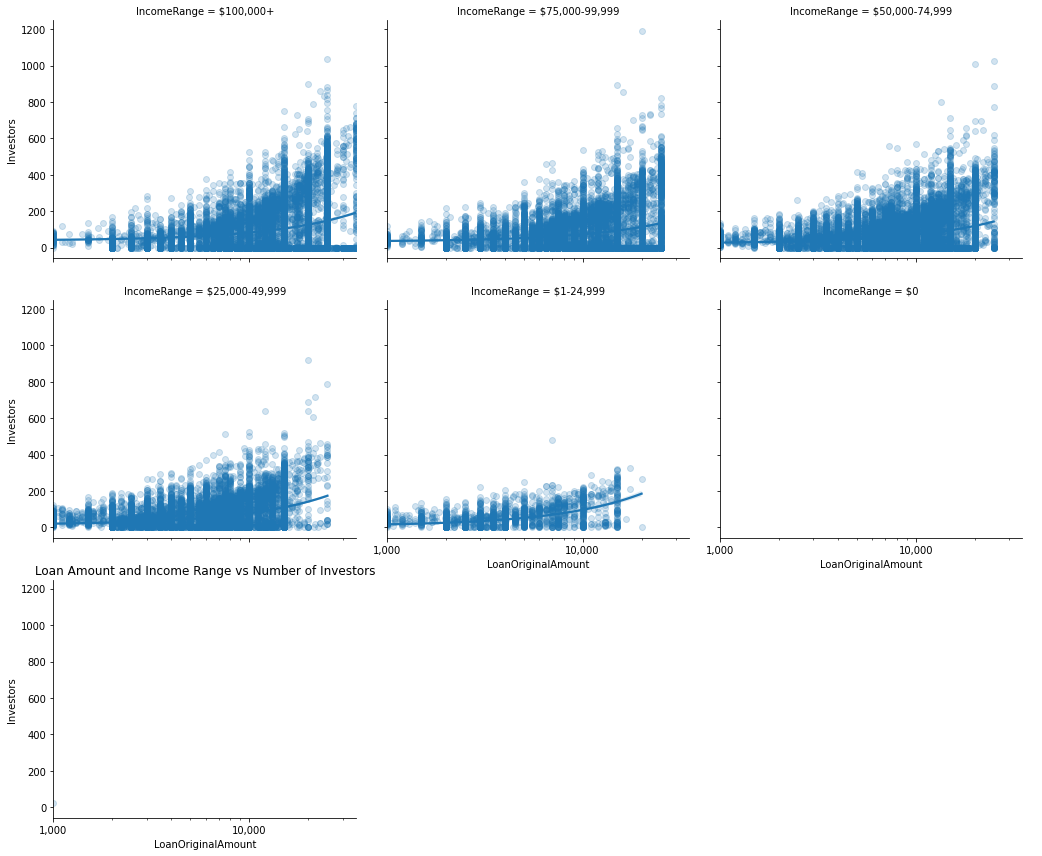

In [8]:
g = sns.FacetGrid(data = loan_data, aspect = 1.2, height = 4, col = 'IncomeRange', 
                        col_wrap = 3)
g.map(sns.regplot, 'LoanOriginalAmount', 'Investors', y_jitter=0.04, scatter_kws={'alpha':0.2});
plt.title('Loan Amount and Income Range vs Number of Investors')
plt.xscale('log');
plt.xticks([1e3, 1e4], ['1,000', '10,000'])
g.add_legend();

## Effect of Prosper Rating on Number of Investors 

From the hypothesis that historical loan defaulters are less likely to have many investors, the data shows an interesting insight on individuals whose loans are past due by over 120 days having more investors if their prosper rating is high.


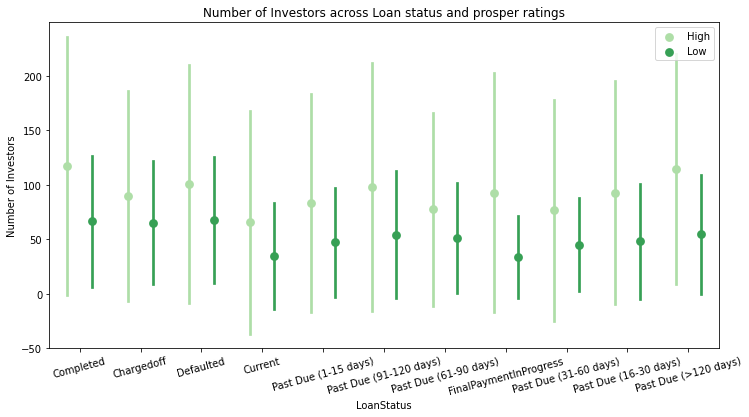

In [9]:
fig = plt.figure(figsize = [12,6])
ax = sns.pointplot(data = loan_data, x = 'LoanStatus', y = 'Investors', hue = 'ProsperRating_Level',
           palette = 'Greens', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Number of Investors across Loan status and prosper ratings');
plt.ylabel('Number of Investors');
plt.xticks(rotation = 15);
plt.legend(loc = 'upper right');

In [10]:
# !jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt